# Name: Mai Vy (Vivian) Nguyen
# Student ID: 47554029

# Heart Failure Prediction 
* __Data Source__: Kaggle-https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
* __Purpose__: Build and evaluate models for heart failure prediction so that we can determine which features play the most important role in predicting whether a patient has heart disease or not.

### The header of the csv file is shown below. 
| Age | Sex | ChestPainType | RestingBP | Cholesterol | FastingBS | RestingECG | MaxHR | ExerciseAngina | Oldpeak | ST_Slope |
   HeartDisease | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
### Description of Fields
* __Age__: age of the patient [years]
* __Sex__: sex of the patient [M: Male, F: Female]
* __ChestPainType__: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* __RestingBP__: resting blood pressure [mm Hg]
* __Cholesterol__: serum cholesterol [mm/dl]
* __FastingBS__: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* __RestingECG__: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* __MaxHR__: maximum heart rate achieved [Numeric value between 60 and 202]
* __ExerciseAngina__: exercise-induced angina [Y: Yes, N: No]
* __Oldpeak__: oldpeak = ST [Numeric value measured in depression]
* __ST_Slope__: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* __HeartDisease__: output class [1: heart disease, 0: Normal]


In [12]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Read csv file 
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Explore the dataset 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
# Convert the categorical features into numerial values
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype=int)
df[["Sex","ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]]=enc.fit_transform(df[["Sex","ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]])

In [16]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [17]:
# Check the correlation between these features
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


## Split the dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], test_size = 0.2, random_state = 42)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (734, 11)
y_train: (734,)
X_test: (184, 11)
y_test: (184,)


### Logistic Regression Model 

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Evaluate the accuracy model
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy on logistic regression:", accuracy_score(y_test, y_pred))

Accuracy on logistic regression: 0.842391304347826


In [21]:
# Feature Selection RFE
from sklearn.feature_selection import RFE
selector = RFE(clf, n_features_to_select=11)
selector = selector.fit(X_train, y_train)
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Tune Logistic Regression by feature selection

In [25]:
from sklearn.feature_selection import RFE
for i in range(1,df.shape[1]):
    selector = RFE(clf, n_features_to_select=i)

# train model selector.fit()
    selector.fit(X_train, y_train)

# Accuracy of model
    clf_test_acc_tuned = selector.score(X_test, y_test)
    print(f'Test Accuracy with {i} features: {clf_test_acc_tuned:.3f}')


Test Accuracy with 1 features: 0.799
Test Accuracy with 2 features: 0.793
Test Accuracy with 3 features: 0.799
Test Accuracy with 4 features: 0.804
Test Accuracy with 5 features: 0.859
Test Accuracy with 6 features: 0.842
Test Accuracy with 7 features: 0.842
Test Accuracy with 8 features: 0.848
Test Accuracy with 9 features: 0.842
Test Accuracy with 10 features: 0.837
Test Accuracy with 11 features: 0.842


- The test accuracy with 5 features (0.859) is the highest 

In [ ]:
# Find the 5 features to provide highest accuracy possible
selector = RFE(clf, step=1, n_features_to_select=5)
selector = selector.fit(X_test, y_test)
selector.ranking_

print("Num Features: %d" % selector.n_features_)
print("Feature Ranking: %s" % selector.ranking_)

for feature in selector.support_.nonzero():
  print(df.columns[feature])

Num Features: 5
Feature Ranking: [4 1 1 6 7 1 3 5 1 2 1]
Index(['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope'], dtype='object')


- The 5 most features that play a significant role in predicting heart failure are Sex, ChestPainType, FastingBS, ExerciseAngina, ST_Slope. 

In [ ]:
# Use RFE selected features to re_train the model 
X_train, X_test, y_train, y_test = train_test_split(df[["Sex", "ChestPainType", "FastingBS", "ExerciseAngina", "ST_Slope"]], df["HeartDisease"], test_size=0.2, random_state=42)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (734, 5)
y_train: (734,)
X_test: (184, 5)
y_test: (184,)


In [ ]:
# Get a accuracy of Logistic Regression model 
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy on logistic regression with selected features:", accuracy_score(y_test, y_pred)) 

Accuracy on logistic regression with selected features: 0.8586956521739131


- The accuracy (85.87%) is improved by selected features as input.


## KNN Model 

In [ ]:
# Train a KNN model 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Get a accuracy of KNN model 
y_pred = neigh.predict(X_test)
print("Accuracy on KNN with selected features:", accuracy_score(y_test, y_pred))

Accuracy on KNN with selected features: 0.8586956521739131


## Hyper Parameter Optimization 

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Accuracy: " + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Accuracy: 0.8623707017053397
Best Parameters: {'n_neighbors': 60}


- By performing hyperparameter tuning, the KNN model is optimized, and it seems to perform better with n_neighbors = 60.
- With an accuracy of approximately 86.24%, the tuned KNN model demonstrates the impact of hyper-parameter K tuning on model performance.

## Evaluation


### Confusion Matrix:

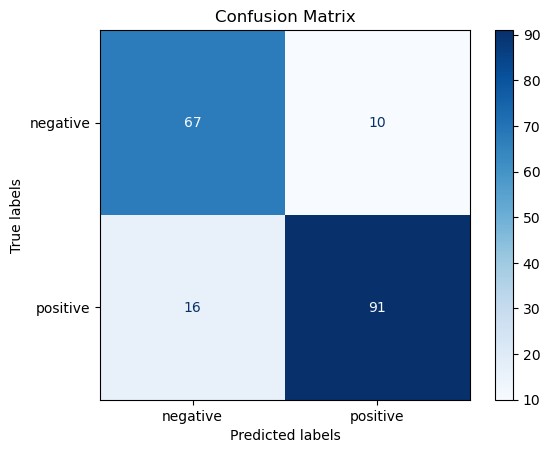

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "positive"])
disp.plot(cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


- This matrix provides a detailed view of the model's performance. With 91 True Positives and 67 True Negatives, the model is doing well in identifying both conditions - with or without heart disease.

- However, the presence of 16 False Negatives is concerning. These represent instances where the model predicted the absence of heart disease, but in reality, the disease was present. In a medical scenario, such misclassifications can have grave implications. It's essential to prioritize the reduction of this number, as failing to identify a patient with heart disease can lead to severe consequences. On the other hand, there are 10 False Positives, indicating patients without heart disease being mistakenly identified as having it. While this is less critical than False Negatives, it can still lead to unnecessary stress and additional medical tests for the patient.

### Classification Report:

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



- Precision (Class 0): Of all instances predicted as no heart disease, 81% were correctly predicted. This indicates a decently low rate of false positives.
- Recall (Class 0): Of all actual no heart disease cases, 87% were correctly identified by the model. This indicates a low rate of false negatives for this class.
- Precision (Class 1): Of all instances predicted as having heart disease, 90% were correctly predicted.
- Recall (Class 1): Of all actual heart disease cases, 85% were correctly identified by the model.
- F1-Score: Harmonic mean of precision and recall. Both classes have F1-scores of above 0.84, indicating good performance.
- Accuracy: The model correctly classified approximately 86% of all cases, indicating a good overall performance.

### ROC Curve and AUC:

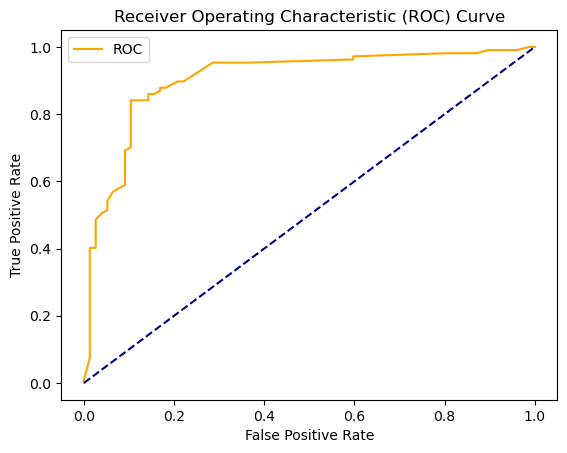

AUC-ROC: 0.9051462556135451


In [ ]:
# ROC Curve and AUC
y_prob = clf.predict_proba(X_test)[:,1]  # Probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("AUC-ROC:", roc_auc_score(y_test, y_prob))


- The ROC curve illustrates the true positive rate (sensitivity) versus the false positive rate (1-specificity) at various threshold settings.
- The curve's closeness to the top-left corner indicates the model's overall accuracy.
- AUC-ROC: The value of 0.9051 means that there's a 90.51% chance that the model will be able to distinguish between positive and negative classes. An AUC value close to 1 implies that the model has a good separability measure, and it's likely to distinguish between patients with heart disease and those without.

## Conclusion 
### 1. Model Performance:
- Both the Logistic Regression and KNN models showcased commendable performance with 85.87%. However, the tuned KNN model illustrates the slight effect of hyper-parameter K tuning on model performance with an accuracy of about 86.24%.

### 2. Feature Importance: 
- The 5 most features that play a significant role in predicting heart disease are Sex, ChestPainType, FastingBS, ExerciseAngina, ST_Slope. These features can be central in clinical settings to assess a patient's risk and decide on further diagnostic tests or treatments.

### 3. Recall & Specificity:
- As highlighted, the model's high recall is of utmost importance in a medical context. Prioritizing recall ensures that as many true positive cases as possible are identified, even if it means risking a few false positives. In the context of heart disease, it's generally more acceptable to have a few false alarms (which can then be further investigated) than to miss a genuine case.

### 4. ROC Curve:
- The ROC curve's shape and the associated AUC value are indicative of the model's robustness in distinguishing between patients with and without heart disease.

